## Black oil simulator

The term black-oil refers to the fluid model, in which water is modeled explicitly together with two hydrocarbon components, an oil phase and one gas phase and another is for water phase. This is in contrast with a compositional formulation, in which each hydrocarbon component is handled separately.

### How reservoir is described in Reservoir simulator

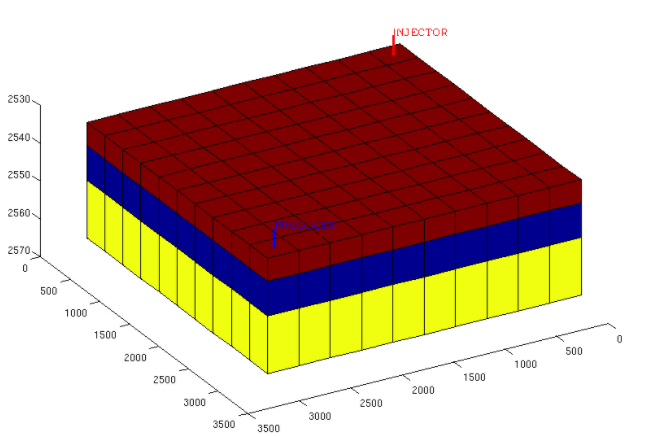

The reservoir is broken into smaller peices of which may be cube or cuboid, each block represent a part of reservoir and each calulation is at the block 

At various grid blocks we have to calculate various parameters like:
    1 - Transmissibility
    2 - Saturation of various phases
    3 - Flow rate either injention or production


In [2]:
## import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install diagrams --quiet

In [4]:
# Input parameters
perm_x = float(input('Permeability in x direction , md= '))
x = int(input('length x of grid block,ft = '))
y = int(input('Length y of grid block , ft= '))
z = int(input('Leangth z of grid block , ft= '))
total_length = int(input('Total length of reservoir, ft = '))
oil_rel_perm = float(input('Relative oil permeability of oil = '))
water_rel_perm = float(input('Relative permeability of water = '))
gas_rel_perm = float(input('Relative permeability of gas = '))
vis_oil = float(input('Oil viscosity , cp= '))
vis_water = float(input('Water viscosity, cp = '))
vis_gas = float(input('Gas viscocity, cp = '))
oil_formation_factor = float(input('Oil formation volume factor , bbl/stb = '))
water_formation_factor = float(input('Water formation volume factor , bbl/stb= '))
gas_formation_factor = float(input('Gas formation volume factor, bbl/stb = '))
initial_pressure = float(input('Initial pressure of the reservoir, Psi = '))
boundary_pressure = float(input('Boundary condition of reservoir, Psi = '))
flow_gridblock_number = int(input('Grid block number of flow = '))
flow_rate = int(input('Flow rate, bbl/day = '))
intial_water_sat = float(input('Initial water saturation = '))
initial_oil_sat = float(input('Initial oil saturation = '))
porosity = float(input('Porosity ,fraction= '))
oil_water_capillary_pressure = float(input('O/W capillary pressure, Psi = '))
gas_oil_capillary_pressure = float(input('O/G capillary pressure , Psi= '))


Permeability in x direction , md= 100
length x of grid block,ft = 200
Length y of grid block , ft= 100
Leangth z of grid block , ft= 50
Total length of reservoir, ft = 350
Relative oil permeability of oil = .4
Relative permeability of water = .4
Relative permeability of gas = .2
Oil viscosity , cp= 100
Water viscosity, cp = 1
Gas viscocity, cp = .005
Oil formation volume factor , bbl/stb = 1.02
Water formation volume factor , bbl/stb= 1.1
Gas formation volume factor, bbl/stb = .0006
Initial pressure of the reservoir, Psi = 5000
Boundary condition of reservoir, Psi = 5000
Grid block number of flow = 5
Flow rate, bbl/day = 1000
Initial water saturation = .4
Initial oil saturation = .4
Porosity ,fraction= .33
O/W capillary pressure, Psi = 50
O/G capillary pressure , Psi= 50


In [5]:
time_step = float(input('Give the time step = '))

Give the time step = 10


In [6]:
R1_sep, R2_sep, R3_sep = input('3 gas solubility values at seperator condition in (scf/STB) =  ').split(' ')
R_sp = int(input('Gas solubility at seperator condition in (scf/STB) = '))
Y1_sep, Y2_sep, Y3_sep = input('3 Gas Specific Gravity values at seperator condition = ').split(' ')
Y_sp = float(input('Gas Specific Gravity at standard condition = '))
Y_oil = float(input('Oil Specific Gravity = '))
Y_water = float(input('Water Specific Gravity = '))

3 gas solubility values at seperator condition in (scf/STB) =  100 400 400
Gas solubility at seperator condition in (scf/STB) = 400
3 Gas Specific Gravity values at seperator condition = .4 .7 .9
Gas Specific Gravity at standard condition = .8
Oil Specific Gravity = .8
Water Specific Gravity = 1.1


## Depltion drive
In depletion drive, the main reason for the oil production is due to expansion of gas present in the reservoir. In this type of reservoir the gas to oil ration increases rapidily. We must calculate the pressure variation of each gris block with time but the pressure remains above bubble point so that the reservoir is a under saturated reservoir

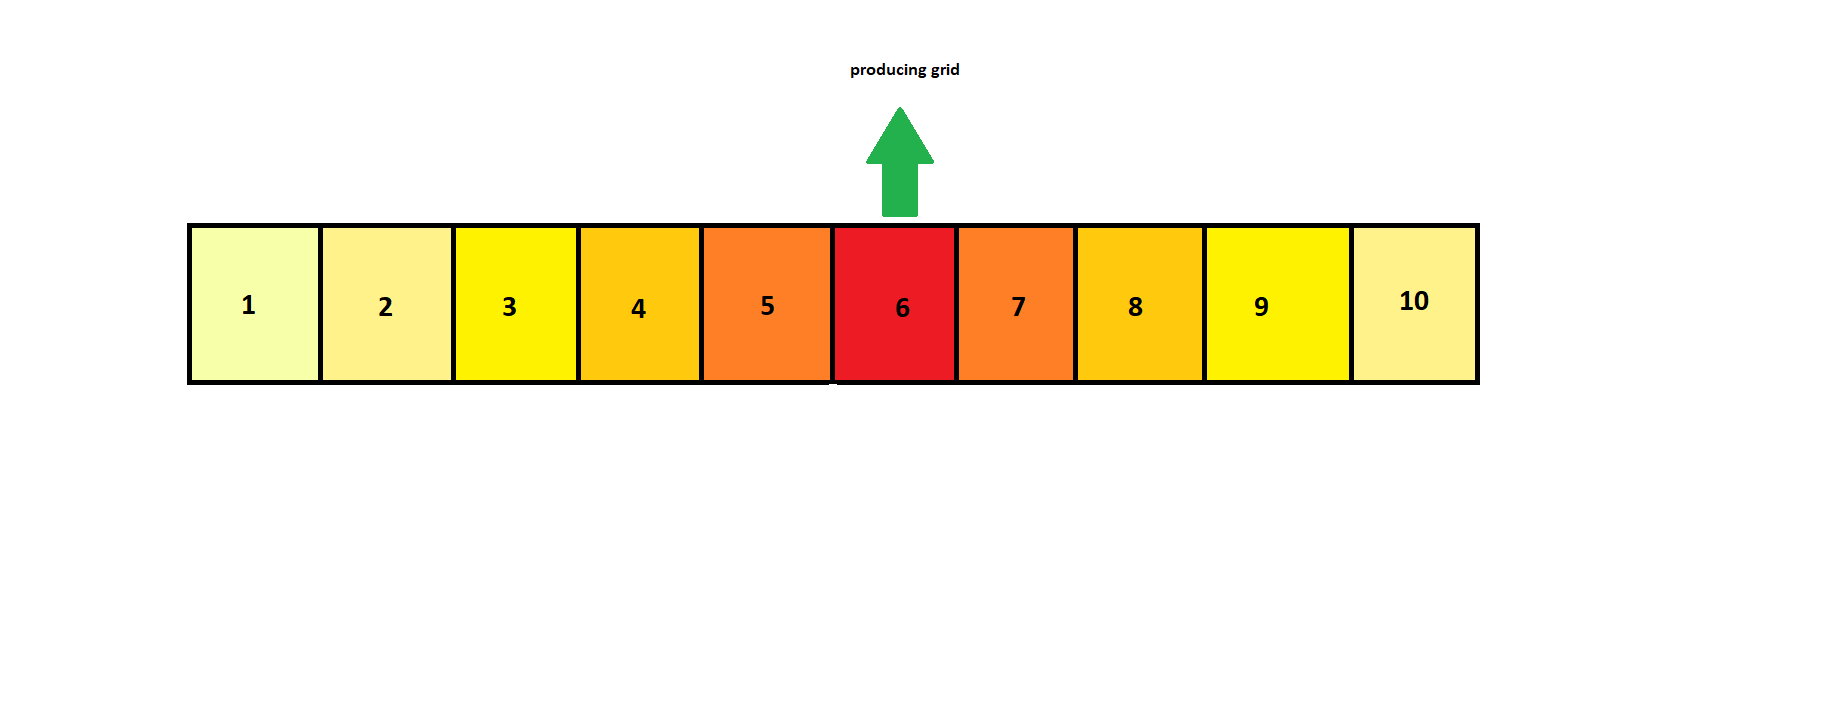

In [7]:
gas_saturation =  [.11, 0.21 , 0.26, 0.34, 0.38, .39, .42, .44, .46, .47, .49]
gas_perm = []
oil_perm = []

In [8]:
oil_s = []
for i in gas_saturation:
    oil_saturation = 1-i-intial_water_sat
    oil_s.append(oil_saturation)
oil_s

[0.49,
 0.39,
 0.33999999999999997,
 0.2599999999999999,
 0.21999999999999997,
 0.20999999999999996,
 0.18000000000000005,
 0.16000000000000003,
 0.14,
 0.13,
 0.10999999999999999]

In [9]:
ko = []
kro_in = .8
for i in oil_s:
    slc = i + 0.4
    for j in gas_saturation:
        kro = 0.8*((1- slc - j)/(1- .1 - slc))
        ko.append(kro)
kro_i = ko[-11:]
kro_i

[0.7794871794871795,
 0.5743589743589744,
 0.47179487179487173,
 0.30769230769230765,
 0.22564102564102562,
 0.20512820512820507,
 0.1435897435897436,
 0.10256410256410253,
 0.06153846153846148,
 0.04102564102564107,
 0.0]

In [10]:
initial_gas_saturation = (1 - initial_oil_sat - intial_water_sat)
for i in gas_saturation:
    rel_gas_perm = ((i/(1-initial_gas_saturation))**2)*(1 - ((1-i -initial_gas_saturation )/(1 - initial_gas_saturation))**2)
    gas_perm.append(rel_gas_perm)

In [11]:
gas_perm_i = gas_perm[:11]

In [12]:
X = np.linspace(0, 1 ,11)
Y1 = gas_perm_i   
Y2 = kro_i

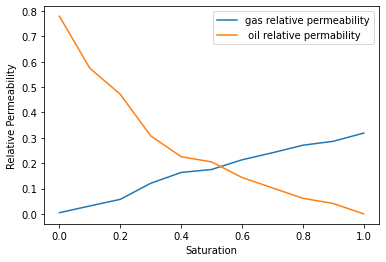

In [13]:
plt.plot(X ,Y1, label = 'gas relative permeability')
plt.plot(X , Y2, label = ' oil relative permability')
plt.xlabel('Saturation')
plt.ylabel('Relative Permeability')
plt.legend()

In [14]:
R1_sep = int(R1_sep)
R2_sep = int(R2_sep)
R3_sep = int(R3_sep)
Y1_sep = float(Y1_sep)
Y2_sep = float(Y2_sep)
Y3_sep = float(Y3_sep)
Yg = float(((Y1_sep*R1_sep + Y2_sep*R2_sep + Y3_sep*R3_sep) + Y_sp*R_sp)/(R1_sep +R2_sep + R3_sep + R_sp))
print('Specific Gas Gravity: ', Yg)
API = float((141.5/Y_oil) - 131.5)
print('API Gravity of Crude oil: ', API)

Specific Gas Gravity:  0.7692307692307693
API Gravity of Crude oil:  45.375


In [15]:
cont_b = .5615
trans_oil = cont_b*perm_x*oil_rel_perm*y*z/(vis_oil*oil_formation_factor*x)
print(trans_oil) 

5.504901960784314


In [16]:
time_step = float(input('Give the time step = '))

Give the time step = 10


In [18]:
comp = float(input('Value of compressibility = '))
volume = x*y*z
left_const = oil_formation_factor*time_step/(volume*porosity*comp)
left_const

Value of compressibility = .00055


0.05619834710743801

In [19]:
p1 = []
p2 = []
p3 = []
p4 = []
p5 = []
p6 = []
p7 = []
p8 = []
p9 = []
p10 = []


In [20]:
p_1 = initial_pressure
p_2 = initial_pressure
p_3 = initial_pressure
p_4 = initial_pressure
p_5 = initial_pressure
p_6 = initial_pressure
p_7 = initial_pressure
p_8 = initial_pressure
p_9 = initial_pressure
p_10 = initial_pressure
for i in range(30):
    p_5 = p_5 - (trans_oil*(p_6 - p_5) + trans_oil*(p_5 - p_4) + float(flow_rate) )*left_const
    p_4 = p_4 - (trans_oil*(p_5 - p_4) + trans_oil*(p_4 - p_3))*left_const
    p_3 = p_3 - (trans_oil*(p_4 - p_3) + trans_oil*(p_3 - p_2))*left_const 
    p_2 = p_2 - (trans_oil*(p_3 - p_2) + trans_oil*(p_2 - p_1))*left_const 
    p_1 = p_1 - (trans_oil*(p_2 - p_1))*left_const 
    p_6 = p_6 - (trans_oil*(p_7 - p_6) + trans_oil*(p_6 - p_5))*left_const
    p_7 = p_7 - (trans_oil*(p_8 - p_7) + trans_oil*(p_7 - p_6))*left_const 
    p_8 = p_8 - (trans_oil*(p_9 - p_8) + trans_oil*(p_8 - p_7))*left_const 
    p_9 = p_9 - (trans_oil*(p_10 - p_9) + trans_oil*(p_9 - p_8))*left_const 
    p_10 = p_10 - (0 + trans_oil*(p_10 - p_9))*left_const
  
    p1.append(p_1)
    p2.append(p_2)
    p3.append(p_3)
    p4.append(p_4)
    p5.append(p_5)
    p6.append(p_6)
    p7.append(p_7)
    p8.append(p_8)
    p9.append(p_9)
    p10.append(p_10)
    
p = [p1, p2, p3,p4 ,p5, p6, p7, p8, p9,p10 ]

In [21]:
list = {'Grid 1': p1,
       'Grid 2':p2,
       'Grid 3':p3,
       'Grid 4':p4,
       'Grid 5':p5,
       'Grid 6':p6,
        'Grid 7':p7,
        'Grid 8':p8,
        'Grid 9':p9,
        'Grid 10':p10}
Pressure_in_grids = pd.DataFrame(list)


In [134]:
Pressure_in_grids

,Grid 1,Grid 2,Grid 3,Grid 4,Grid 5,Grid 6,Grid 7,Grid 8,Grid 9,Grid 10
0,4949.729164,5064.998446,4915.959267,5108.661749,4859.504132,4891.338251,4915.959267,4935.001554,4949.729164,4961.119732
1,4809.847817,5130.590888,4864.920414,5130.989910,4887.089730,4869.010090,4864.920414,4869.409112,4878.798705,4897.451334
2,4624.699122,5049.238649,4915.033436,5065.796491,4949.213241,4934.203509,4915.033436,4897.433632,4878.785014,4883.014504
3,4460.738713,4836.694237,4899.511666,5069.307759,4910.493488,4930.692241,4940.756175,4945.363119,4927.006429,4917.038561
4,4316.833608,4646.803015,4706.261468,5086.560031,4877.205077,4881.540806,4891.394979,4917.820654,4927.611312,4925.215696
5,4158.758235,4521.219577,4479.208633,4940.374445,4895.274354,4884.541176,4865.656099,4869.903503,4884.831978,4893.982283
6,3990.246001,4376.638701,4345.696286,4693.846404,4797.960828,4832.184572,4836.483675,4832.510153,4837.288450,4850.134367
7,3830.543334,4196.736003,4222.853941,4535.469587,4550.472011,4610.978581,4665.147618,4699.373683,4720.687728,4750.018268
8,3671.341202,4036.386162,4037.870110,4435.913673,4351.576280,4368.457498,4409.211754,4458.473187,4495.202104,4552.939376
9,3504.065164,3887.623309,3863.686405,4261.599644,4263.252096,4255.569967,4252.283161,4270.595795,4276.833068,4339.394346


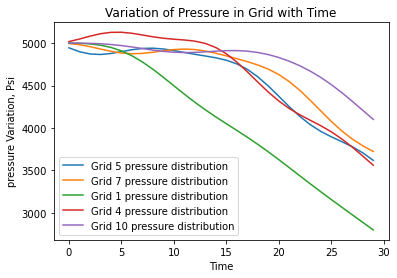

In [22]:
x1 = Pressure_in_grids['Grid 5']

plt.plot(range(0, 30) , x1, label = "Grid 5 pressure distribution")
x2 = Pressure_in_grids['Grid 7']
plt.plot(range(0, 30) , x2, label = "Grid 7 pressure distribution")
x3 = Pressure_in_grids['Grid 1']
plt.plot(range(0, 30) , x3, label = "Grid 1 pressure distribution")
x4 = Pressure_in_grids['Grid 4']
plt.plot(range(0, 30) , x4, label = "Grid 4 pressure distribution")
x5 = Pressure_in_grids['Grid 10']
plt.plot(range(0, 30) , x5, label = "Grid 10 pressure distribution")
plt.xlabel("Time")
plt.ylabel("pressure Variation, Psi")
plt.title('Variation of Pressure in Grid with Time')
plt.legend()

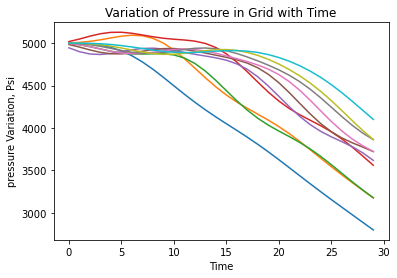

In [23]:
plt.plot(range(0, 30), Pressure_in_grids)
plt.xlabel("Time")
plt.ylabel("pressure Variation, Psi")
plt.title('Variation of Pressure in Grid with Time')
plt.show()

In [28]:
Rs = []
T = 650

for j in p[5]:
    x1 = float(.0125*API - .00091*(T - 460))
    R = Yg * (((j/18.2) + 1.4)*10**x1)**1.2048
    Rs.append(R)
print(f'Gas solubility in scf/stb : {Rs} ')

print('\n')
B_oil = []
for i in Rs:
    B_o = .9759 + .000120*((i*((Yg/Y_oil)**.5)) + 1.25*(T - 460))
    B_oil.append(B_o)

print(f'formation Volume Factor in bbl/stb {B_oil} ')
print('\n')

trans_oil1 = []
for i in B_oil:
    tran_oil1 = (cont_b*perm_x*oil_rel_perm*y*z)/(i*vis_oil*x)
    trans_oil1.append(tran_oil1)
    
print(f"Transmissibility of oil in md-ft/cp, {trans_oil1}")

Gas solubility in scf/stb : [1996.7588871042508, 1982.462506919617, 1966.2657169300012, 1952.5491655041862, 1944.6793898149817, 1944.0335234695117, 1949.6959866837165, 1958.8928831559824, 1967.992210603538, 1973.7147538201027, 1974.1290911882372, 1969.081011794041, 1959.9179188530088, 1948.6356357595214, 1936.791374584759, 1924.609376501097, 1910.6317944604568, 1892.0710750635772, 1865.7679972209166, 1829.4305688780544, 1782.702844113707, 1727.6479355263125, 1668.4289488672646, 1610.263750705269, 1557.9936445313767, 1514.7346045726226, 1481.03588149103, 1454.7962644699799, 1431.9578626213715, 1407.7710909029438, 1378.246870915131, 1341.3352628343287, 1297.4439298875493, 1249.1342898169212, 1200.128400426582, 1154.0001918360877, 1113.0114250343045, 1077.4672038952726, 1045.7661128949271, 1015.0890487271222, 982.4719267321915, 945.8846939413696, 904.933040537756, 860.9311633600067, 816.3293859865424] 


formation Volume Factor in bbl/stb [1.2393579814450244, 1.2376757309480584, 1.2357698

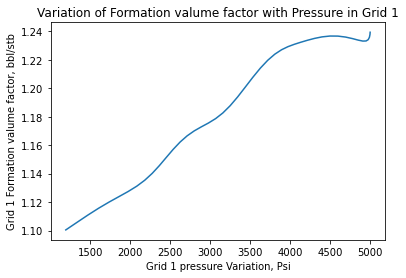

In [29]:
plt.plot(p[0], B_oil)
plt.xlabel("Grid 1 pressure Variation, Psi")
plt.ylabel("Grid 1 Formation valume factor, bbl/stb")
plt.title('Variation of Formation valume factor with Pressure in Grid 1')
plt.show()

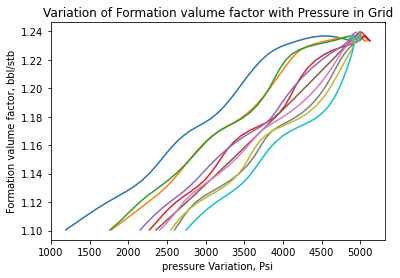

In [30]:
plt.plot(Pressure_in_grids, B_oil )
plt.xlabel("pressure Variation, Psi")
plt.ylabel("Formation valume factor, bbl/stb")
plt.title('Variation of Formation valume factor with Pressure in Grid')
plt.show()

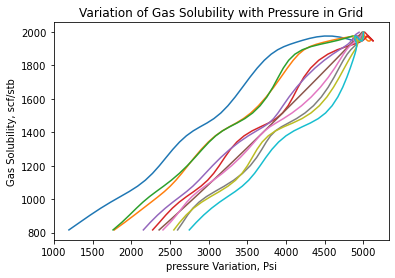

In [31]:
plt.plot(Pressure_in_grids, Rs)
plt.xlabel("pressure Variation, Psi")
plt.ylabel("Gas Solubility, scf/stb")
plt.title('Variation of Gas Solubility with Pressure in Grid')
plt.show()

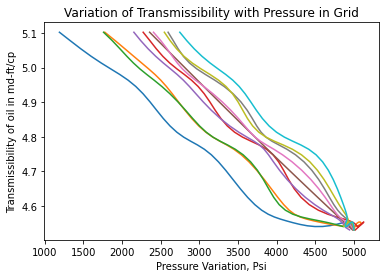

In [33]:
plt.plot(Pressure_in_grids,trans_oil1 )
plt.xlabel("Pressure Variation, Psi")
plt.ylabel("Transmissibility of oil in md-ft/cp")
plt.title('Variation of Transmissibility with Pressure in Grid')
plt.show()

In [ ]:
# def pr_variation():
#     time_step = float(input('Give the time step'))
#     comp = float(input('Value of compressibility = '))
#     left_const = oil_formation_factor*time_step/(volume*porosity*comp)
#     p1 = []
#     p2 = []
#     p3 = []
#     p4 = []
#     p5 = []
#     p6 = []
#     p7 = []
#     p8 = []
#     p9 = []
#     p10 = []
#     volume = x*y*z
#     p_1 = initial_pressure
#     p_2 = initial_pressure
#     p_3 = initial_pressure
#     p_4 = initial_pressure
#     p_5 = initial_pressure
#     p_6 = initial_pressure
#     p_7 = initial_pressure
#     p_8 = initial_pressure
#     p_9 = initial_pressure
#     p_10 = initial_pressure
#     for i in range(30):
#         p_5 = p_5 - (trans_oil*(p_6 - p_5) + trans_oil*(p_5 - p_4) + float(flow_rate) )*left_const
#         p_4 = p_4 - (trans_oil*(p_5 - p_4) + trans_oil*(p_4 - p_3))*left_const
#         p_3 = p_3 - (trans_oil*(p_4 - p_3) + trans_oil*(p_3 - p_2))*left_const 
#         p_2 = p_2 - (trans_oil*(p_3 - p_2) + trans_oil*(p_2 - p_1))*left_const 
#         p_1 = p_1 - (trans_oil*(p_2 - p_1))*left_const 
#         p_6 = p_6 - (trans_oil*(p_7 - p_6) + trans_oil*(p_6 - p_5))*left_const
#         p_7 = p_7 - (trans_oil*(p_8 - p_7) + trans_oil*(p_7 - p_6))*left_const 
#         p_8 = p_8 - (trans_oil*(p_9 - p_8) + trans_oil*(p_8 - p_7))*left_const 
#         p_9 = p_9 - (trans_oil*(p_10 - p_9) + trans_oil*(p_9 - p_8))*left_const 
#         p_10 = p_10 - (0 + trans_oil*(p_10 - p_9))*left_const
  
#         p1.append(p_1)
#         p2.append(p_2)
#         p3.append(p_3)
#         p4.append(p_4)
#         p5.append(p_5)
#         p6.append(p_6)
#         p7.append(p_7)
#         p8.append(p_8)
#         p9.append(p_9)
#         p10.append(p_10)
    
#     p = [p1, p2, p3,p4 ,p5, p6, p7, p8, p9,p10 ]
#     list = {'Grid 1': p1,
#            'Grid 2':p2,
#            'Grid 3':p3,
#            'Grid 4':p4,
#            'Grid 5':p5,
#            'Grid 6':p6,
#             'Grid 7':p7,
#             'Grid 8':p8,
#             'Grid 9':p9,
#             'Grid 10':p10}
#     Pressure_in_grids = pd.DataFrame(list)


In [121]:
G11 = Pressure_in_grids['Grid 5']
xx = range(0,30)

In [128]:
G12 = Pressure_in_grids['Grid 5']

In [135]:
G13 = Pressure_in_grids['Grid 5']

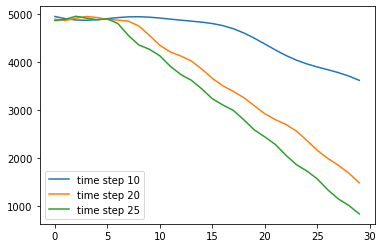

In [136]:
plt.plot(xx, G11, label = 'time step 10')
plt.plot(xx, G12, label = 'time step 20')
plt.plot(xx, G13, label = 'time step 25')
plt.legend()